# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
data =  pd.read_csv("Students_Grading_Dataset.csv")
data

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,Business,NaN,82.15,60.33,...,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Business,65.11,86.31,49.80,...,60.87,95.96,C,5.0,No,Yes,NaN,Medium,4,4.0
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,87.54,63.55,64.21,...,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,S5998,Sara,Davis,student4998@university.com,Male,23,CS,92.56,79.79,94.28,...,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [4]:
# memeriksa missing value
data.isnull().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

In [11]:
# menampilkan kolom yang memiliki missing value
data.columns[data.isnull().any()]

data_mv = data[['Attendance (%)', 'Assignments_Avg', 'Parent_Education_Level']]
data_mv

,Attendance (%),Assignments_Avg,Parent_Education_Level
0,52.29,84.22,High School
1,97.27,NaN,NaN
2,57.19,67.70,Master's
3,95.15,66.06,High School
4,54.18,96.85,High School
...,...,...,...
4995,NaN,80.09,High School
4996,65.11,NaN,NaN
4997,87.54,94.28,High School
4998,92.56,81.20,Bachelor's


In [5]:
# memeriksa data duplikat
data.duplicated().sum()

np.int64(0)

In [6]:
# memeriksa nilai outlier
data.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


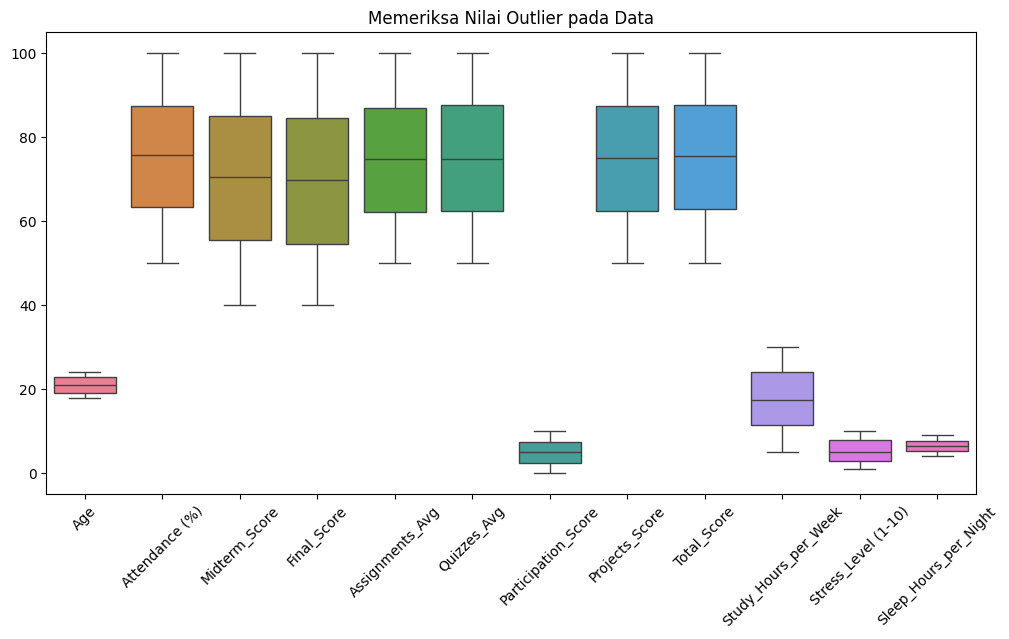

Kolom Age: 0 nilai outlier
Kolom Attendance (%): 0 nilai outlier
Kolom Midterm_Score: 0 nilai outlier
Kolom Final_Score: 0 nilai outlier
Kolom Assignments_Avg: 0 nilai outlier
Kolom Quizzes_Avg: 0 nilai outlier
Kolom Participation_Score: 0 nilai outlier
Kolom Projects_Score: 0 nilai outlier
Kolom Total_Score: 0 nilai outlier
Kolom Study_Hours_per_Week: 0 nilai outlier
Kolom Stress_Level (1-10): 0 nilai outlier
Kolom Sleep_Hours_per_Night: 0 nilai outlier


In [8]:
# memeriksa outlier
def detect_outlier(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_student = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers_student

numerical_columns = data.select_dtypes(include=['number']).columns

# plot bloxpot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_columns])
plt.xticks(rotation=45)  # Putar label sumbu x agar lebih terbaca
plt.title("Memeriksa Nilai Outlier pada Data")
plt.show()

# memeriksa outlier setiap kolom
for col in numerical_columns:
    outliers = detect_outlier(data, col)
    print(f"Kolom {col}: {len(outliers)} nilai outlier")
    if not outliers.empty:
        outliers

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [12]:
# mengisi missing values dengan imputasi (mean)
data['Attendance (%)'].fillna(data['Attendance (%)'].mean(), inplace=True)
data['Assignments_Avg'].fillna(data['Assignments_Avg'].mean(), inplace=True)

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_35272\1538285096.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Attendance (%)'].fillna(data['Attendance (%)'].mean(), inplace=True)
C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_35272\1538285096.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [13]:
# mengisi missing values pada kolom Parent_Education_Level
data['Parent_Education_Level'].fillna("Unknown", inplace=True)

In [15]:
# memeriksa missing value
data.isnull().sum()

Student_ID                    0
First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

In [ ]:
# 

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.290000,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.270000,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,Unknown,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.190000,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.150000,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.180000,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,Business,75.431409,82.15,60.33,...,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Business,65.110000,86.31,49.80,...,60.87,95.96,C,5.0,No,Yes,Unknown,Medium,4,4.0
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,87.540000,63.55,64.21,...,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,S5998,Sara,Davis,student4998@university.com,Male,23,CS,92.560000,79.79,94.28,...,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4


In [ ]:
# Mengganti nilai ordinal dari kolom Grade menjadi numerik
grade_mapping = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6}

data['Grade_enc'] = data['Grade'].replace(grade_mapping).astype(int)

data

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_35272\397400051.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Grade_enc'] = data['Grade'].replace(grade_mapping).astype(int)


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Grade_enc
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.290000,55.03,57.82,...,56.09,F,6.2,No,Yes,High School,Medium,5,4.7,6
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.270000,97.23,45.80,...,50.64,A,19.0,No,Yes,Unknown,Medium,4,9.0,1
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.190000,67.05,93.68,...,70.30,D,20.7,No,Yes,Master's,Low,6,6.2,4
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.150000,47.79,80.63,...,61.63,A,24.8,Yes,Yes,High School,High,3,6.7,1
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.180000,46.59,78.89,...,66.13,F,15.4,Yes,Yes,High School,High,2,7.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,Business,75.431409,82.15,60.33,...,85.21,D,25.5,No,Yes,High School,Low,10,8.3,4
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Business,65.110000,86.31,49.80,...,95.96,C,5.0,No,Yes,Unknown,Medium,4,4.0,3
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,87.540000,63.55,64.21,...,54.25,A,24.8,Yes,No,High School,Medium,4,6.3,1
4998,S5998,Sara,Davis,student4998@university.com,Male,23,CS,92.560000,79.79,94.28,...,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4,1


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
#Type your code here

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.